In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('datasets\\Family Income and Expenditure.csv')

In [3]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [4]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [64]:
df.dtypes

Total Household Income                 int64
Region                                object
Total Food Expenditure                 int64
Main Source of Income                 object
Agricultural Household indicator       int64
                                      ...   
Number of Motorized Banca              int64
Number of Motorcycle/Tricycle          int64
Household_Type_Num                     int64
RestExp_Bin                         category
Income_Bin                          category
Length: 63, dtype: object

<h1>Question 1</h1>
<h3>Wich region spends the most on food, and what might this indicate about the lifestyle and living costs in that region?</h3>

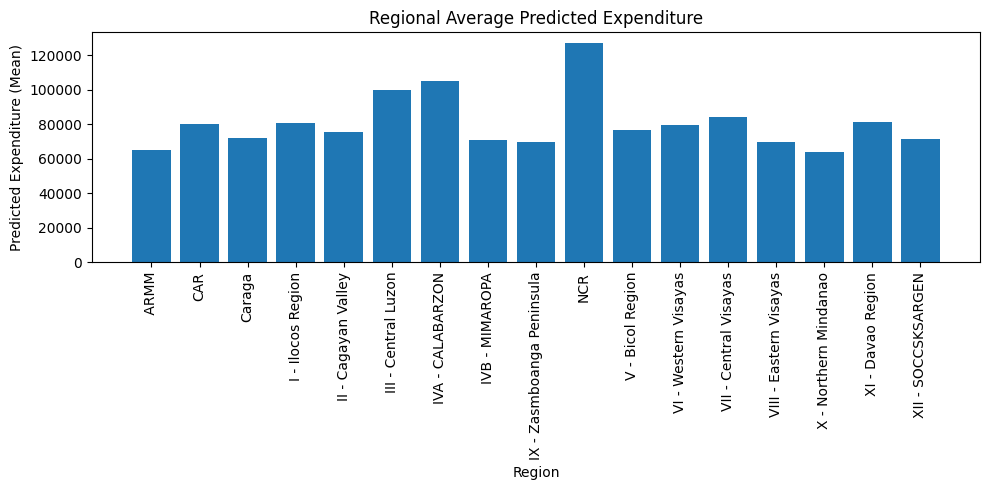

In [12]:
expense_col = "Total Food Expenditure"

region_mean = df.groupby("Region")[expense_col].mean()

plt.figure(figsize=(10,5))
plt.bar(region_mean.index, region_mean.values)
plt.xticks(rotation=90)
plt.title("Regional Average Predicted Expenditure")
plt.ylabel("Predicted Expenditure (Mean)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


<h2>INSIGHT:</h2>
<H4>This barchart clearly shows that NCR households spend the most on food, standing noticeably higher than any other region.
This suggests that living costs and household consumption patterns in NCR are significantly higher, meaning future predictions will likely place NCR as a consistent top spender due to its urban lifestyle, higher prices, and greater access to food establishments.</H4>

<h1>Question 2:</h1>
<h3>Which region has the highest average total household income?</h3>

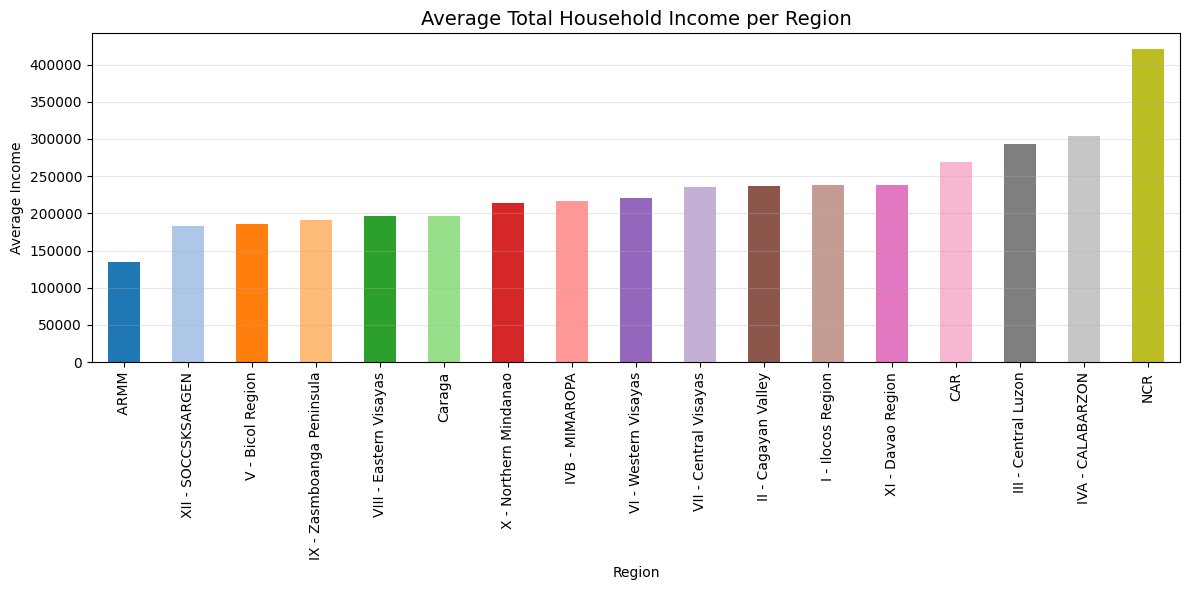

In [69]:
df_clean = df.fillna(df.median(numeric_only=True))

income_per_region = df_clean.groupby('Region')['Total Household Income'].mean().sort_values()

plt.figure(figsize=(12,6))
colors = sns.color_palette("tab20", len(income_per_region))

income_per_region.plot(kind='bar', color=colors)

plt.title("Average Total Household Income per Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Average Income")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<h2>INSIGHT:</h2>
<H4>The NCR region has the highest average household income, going over 4,000,000, which is much higher than other regions. This is likely because there are better job opportunities and a stronger local economy there. On the other hand, regions with lower incomes  like ARMM Region might need extra support to help improve their living conditions.</H4>